In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
from sklearn import preprocessing
from scipy import stats


In [2]:
mainDF = pd.read_csv("TD_Sterling offspring genotypes for Colony header.csv", sep = ',')
mainDF.shape

(54, 133)

## seting heritage

In [3]:
mainDF['Father'] = mainDF['Sample'].apply(lambda x :sum(map(ord, x.split('x')[0])) )
mainDF['Father'] = (mainDF['Father'] - mainDF['Father'].mean())/mainDF["Father"].std(ddof=0)
mainDF['Father'] = mainDF['Father'].apply(lambda x : (x+2)*50)
mainDF['Mother'] = mainDF['Sample'].apply(lambda x : sum(map(ord, x.split('x')[1])))

mainDF.head()

,Sample,Pop,Actm110i262,Actm110i266,Actm110i291,Actm110i292,Actm110i295,Actm110i296,Actm110i299,Actm110i301,...,Atr117i265,Atr117i277,Atr1101i132,Atr1101i136,Atr1101i140,Atr1101i144,Atr1101i148,Atr1101i152,Father,Mother
0,y243x7219015,Pop1,1,1,0,1,0,0,1,0,...,0,0,1,1,1,1,0,0,182.821688,361
1,y243x7219016,Pop1,1,0,1,1,0,0,1,0,...,0,0,1,1,1,1,0,0,182.821688,362
2,y243x7219017,Pop1,1,1,1,1,0,0,1,0,...,0,0,1,1,1,1,0,0,182.821688,363
3,y243x3d09015,Pop1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,1,0,182.821688,406
4,y243x3d09016,Pop1,1,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,0,182.821688,407


## Getting  of matrix values for PCA

#### X for values
#### Y for classes

In [4]:
X = mainDF.iloc[:,2:-2].values
Y = mainDF.iloc[:, -2:].values


## Calculating PCAS and adding them to the dataframe

In [5]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
PCvalues = sklearn_pca.fit_transform(X)
mainDF["PC1"] = pd.Series(PCvalues[:,0], index = mainDF.index)
mainDF["PC2"] = pd.Series(PCvalues[:,1], index = mainDF.index)
mainDF = mainDF.sort_index(ascending = False, axis= 1)
mainDF.head()


,Sample,Pop,PC2,PC1,Mother,Father,Atr117i277,Atr117i265,Atr117i245,Atr117i241,...,Actm110i307,Actm110i303,Actm110i301,Actm110i299,Actm110i296,Actm110i295,Actm110i292,Actm110i291,Actm110i266,Actm110i262
0,y243x7219015,Pop1,0.698273,-1.633485,361,182.821688,0,0,1,0,...,0,1,0,1,0,0,1,0,1,1
1,y243x7219016,Pop1,1.429142,-1.991206,362,182.821688,0,0,1,0,...,0,0,0,1,0,0,1,1,0,1
2,y243x7219017,Pop1,0.786280,-2.269844,363,182.821688,0,0,0,0,...,1,0,0,1,0,0,1,1,1,1
3,y243x3d09015,Pop1,0.870038,-1.503038,406,182.821688,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
4,y243x3d09016,Pop1,1.110871,-1.320055,407,182.821688,0,0,1,0,...,0,0,0,1,0,0,1,1,0,1


Text(0.5,1,'PCA Analysis')

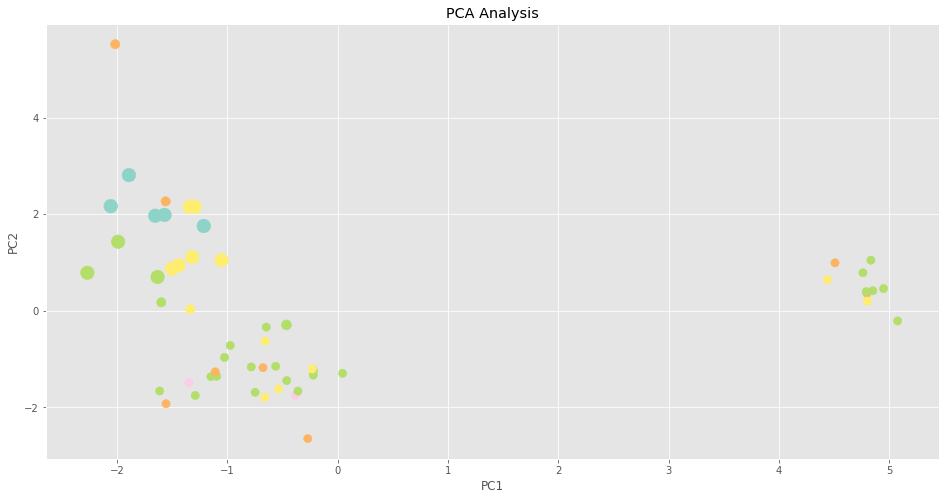

In [29]:
mainDF.plot.scatter('PC1', 'PC2',   s = mainDF['Father'], c = "Mother", cmap = 'Set3',colorbar = False)
plt.title("PCA Analysis")

## Calculating TSNE and adding them to the dataframe

Text(0.5,1,'tSNE analysis')

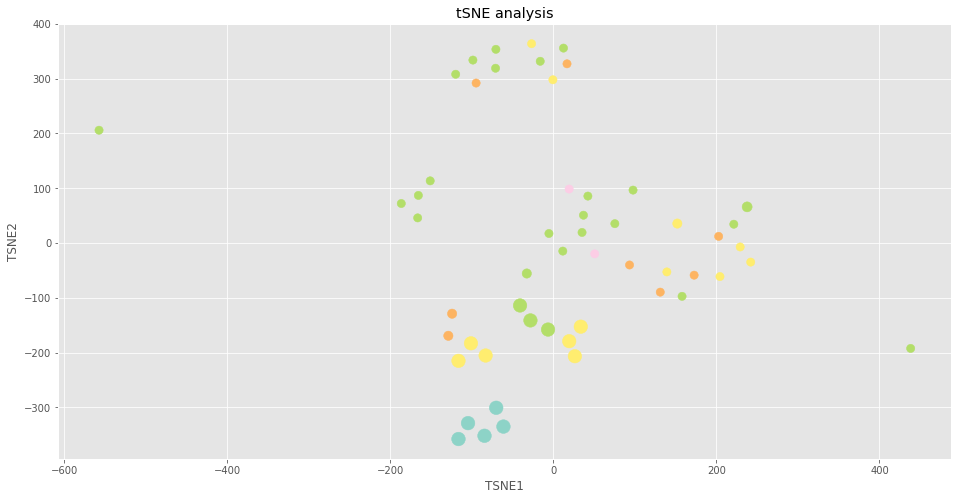

In [33]:
from sklearn.manifold import TSNE
TSNEvalues = TSNE(n_components=2,  perplexity=7.0).fit_transform(X)
mainDF["TSNE1"] = pd.Series(TSNEvalues[:,0], index = mainDF.index)
mainDF["TSNE2"] = pd.Series(TSNEvalues[:,1], index = mainDF.index)
mainDF = mainDF.sort_index(ascending = False, axis= 1)
mainDF.plot.scatter('TSNE1', 'TSNE2', s = mainDF['Father'], c = "Mother", cmap = 'Set3', colorbar = False)
plt.title("tSNE analysis")

## Testing diferent values for perplexity

In [34]:
for i in range(25):
    TSNEvalues = TSNE(n_components=2,  perplexity=i).fit_transform(X)
    mainDF["TSNE1 nc="+ str(i) ] = pd.Series(TSNEvalues[:,0], index = mainDF.index)
    mainDF["TSNE2 nc="+ str(i) ] = pd.Series(TSNEvalues[:,1], index = mainDF.index)
    mainDF = mainDF.sort_index(ascending = False, axis= 1)
    mainDF.plot.scatter("TSNE1 nc="+ str(i), "TSNE2 nc="+ str(i) , s = mainDF['Father'], c = "Mother", cmap = 'Set3', colorbar = False)
    plt.title("tSNE analysis with perplexity set as "+ str(i))
    plt.savefig("images_for_video/tSNE analysis perplexity"+ str(i)+'.png')
    plt.close()
#system("convert images_for_video/*.png  -delay 8 images_for_video/animation.mp4")
#system('rm -f images_for_video/*.png')